In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diwali-sales-dataset/Diwali Sales Data.csv


# Import library

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv(r"/kaggle/input/diwali-sales-dataset/Diwali Sales Data.csv",encoding="latin1")

In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [7]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [8]:
df.drop(columns=["unnamed1","Status"],inplace = True)

In [9]:
df["Amount"].fillna(df["Amount"].median(), inplace=True)

/tmp/ipykernel_17/3532854038.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Amount"].fillna(df["Amount"].median(), inplace=True)


In [10]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df["Amount"] = df["Amount"].astype("int")

In [12]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9452.176429
std,12.754122,1.115047,5219.753707
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

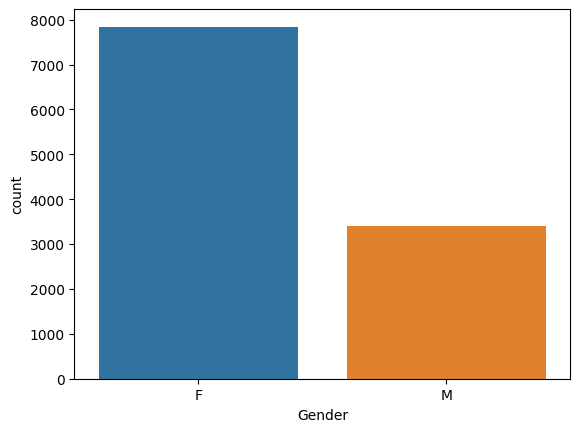

In [13]:
sns.countplot(x = "Gender",data = df)
plt.show()

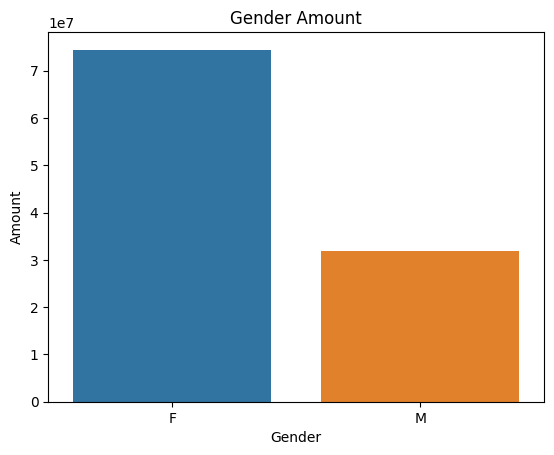

In [14]:
sales_gen = df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by = "Amount",ascending = False)
sns.barplot(data = sales_gen,x="Gender",y="Amount")
plt.title("Gender Amount" )
plt.show()

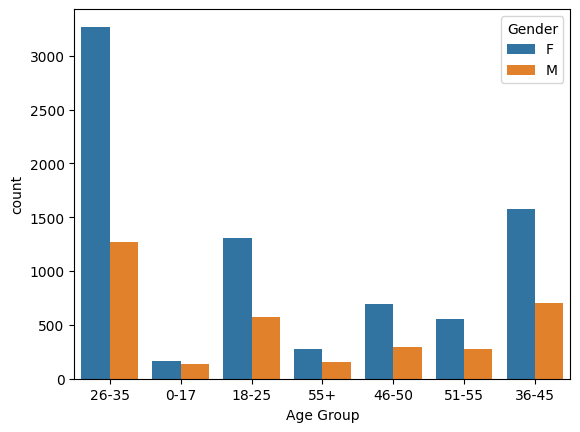

In [15]:
sns.countplot(x = "Age Group", hue= "Gender",data = df)
plt.show()

In [16]:
 sales_age= df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by = "Amount",ascending = False)

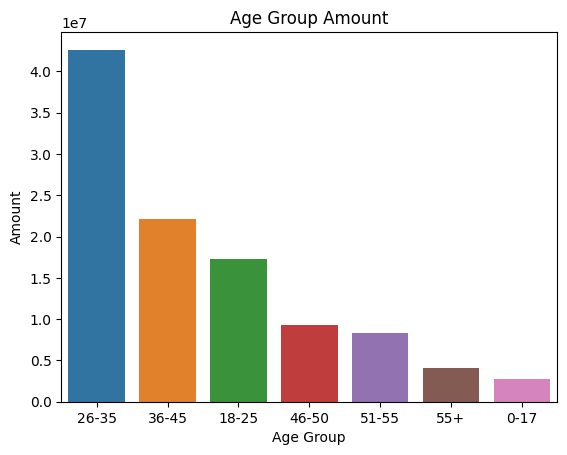

In [17]:
sns.barplot(x = "Age Group", y = "Amount", data = sales_age)
plt.title("Age Group Amount")
plt.show()

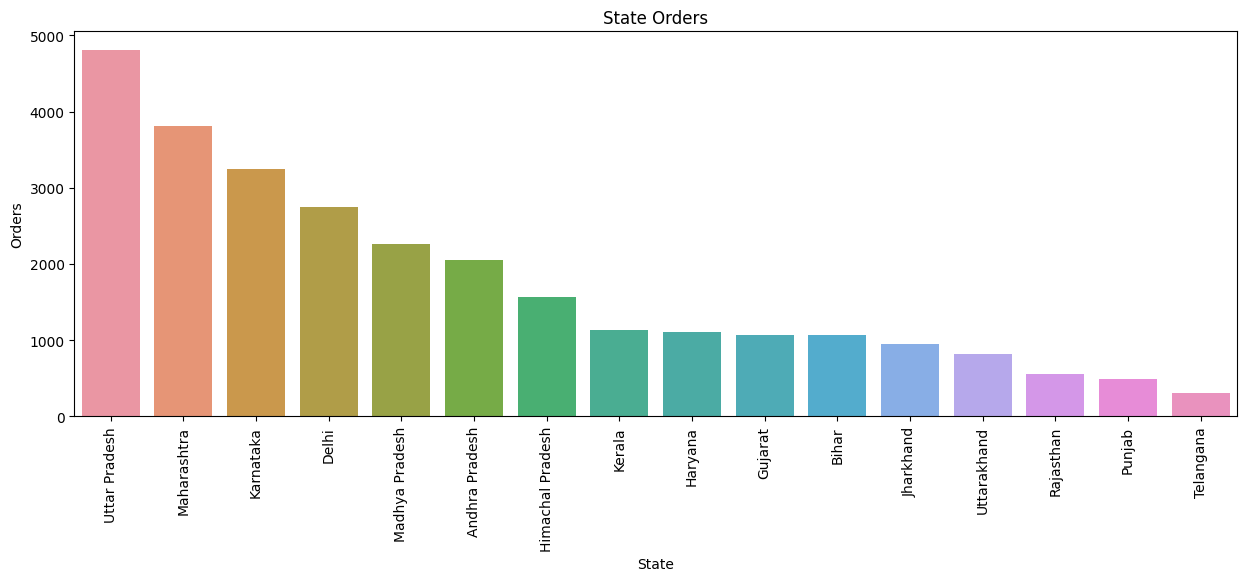

In [18]:
sales_state = df.groupby(["State"],as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False)
plt.figure(figsize = (15,5))
sns.barplot(x = "State", y ="Orders", data = sales_state)
plt.title("State Orders")
plt.xticks(rotation ="vertical")
plt.show()


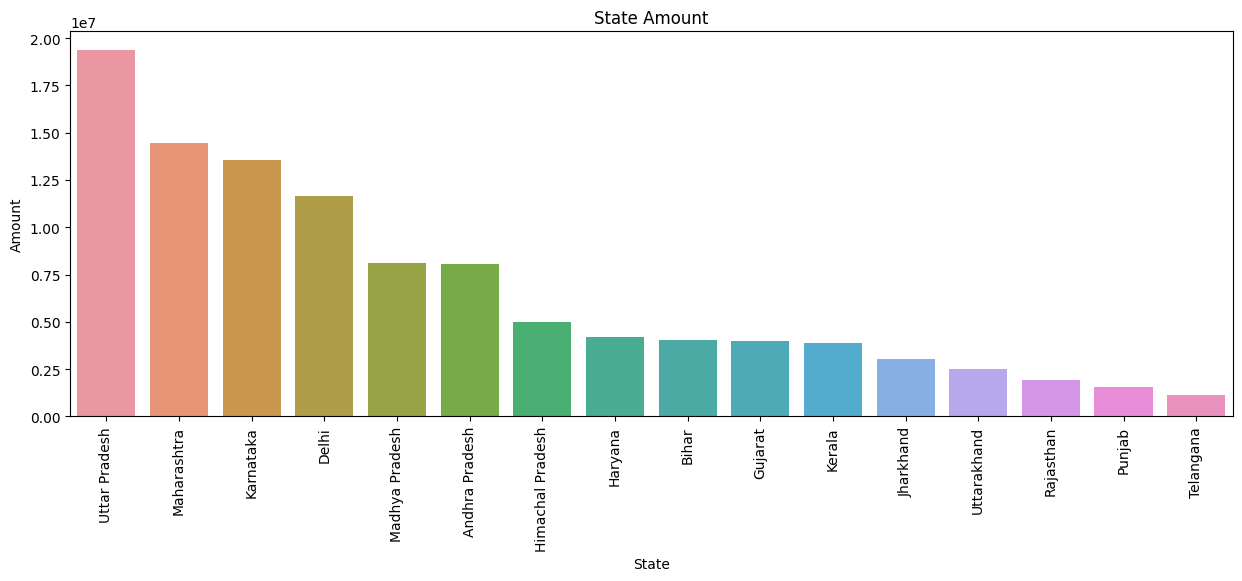

In [19]:
sales_state  = df.groupby(["State"],as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)
plt.figure(figsize = (15,5))
sns.barplot(x = "State", y = "Amount", data = sales_state)
plt.title("State Amount")
plt.xticks(rotation = "vertical")
plt.show()

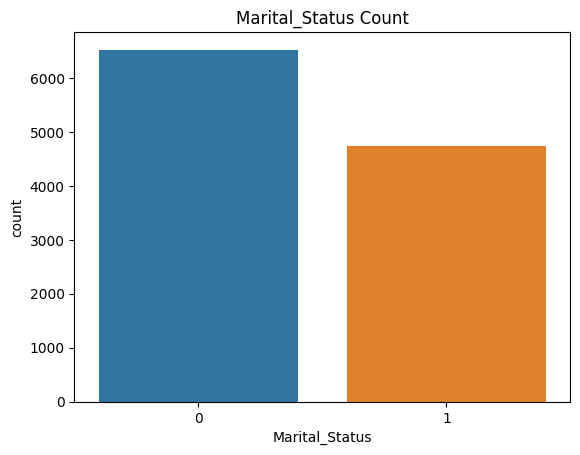

In [20]:
sns.countplot(x = "Marital_Status",data = df)
plt.title("Marital_Status Count")
plt.show()

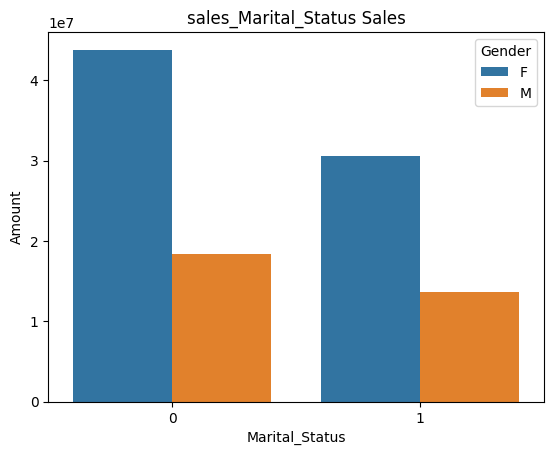

In [21]:
sales_Marital_Status = df.groupby(["Marital_Status", "Gender"], as_index=False)["Amount"].sum().sort_values(by = "Amount",ascending = False)

sns.barplot(x = "Marital_Status", y = "Amount",data = sales_Marital_Status,hue = "Gender")
plt.title("sales_Marital_Status Sales")
plt.show()

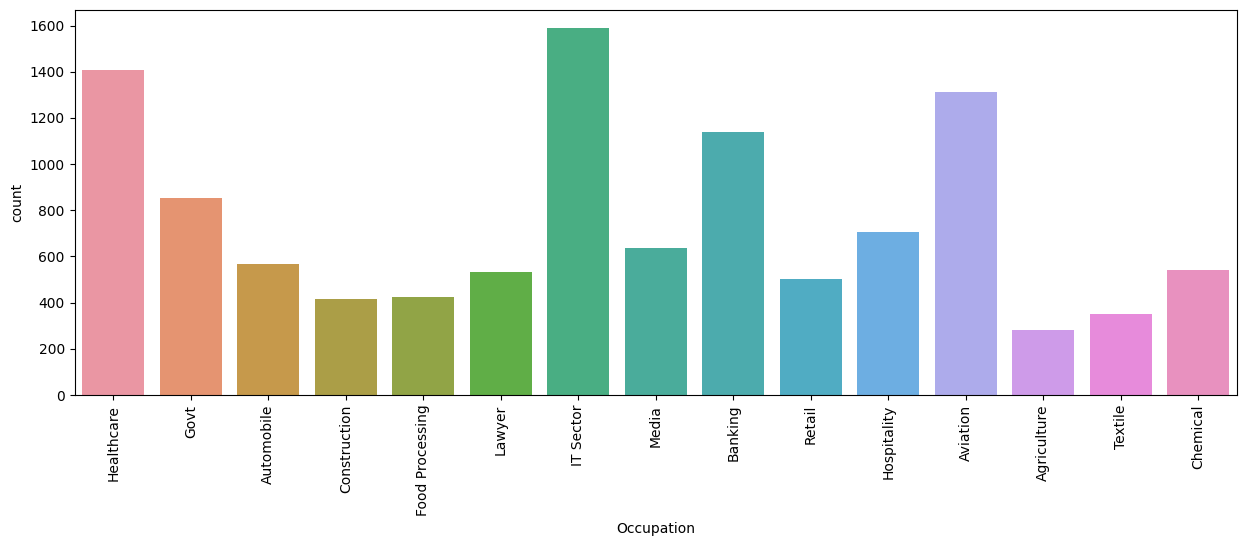

In [22]:
plt.figure(figsize = (15,5))
sns.countplot(x = "Occupation", data = df)
plt.xticks(rotation = "vertical")
plt.show()

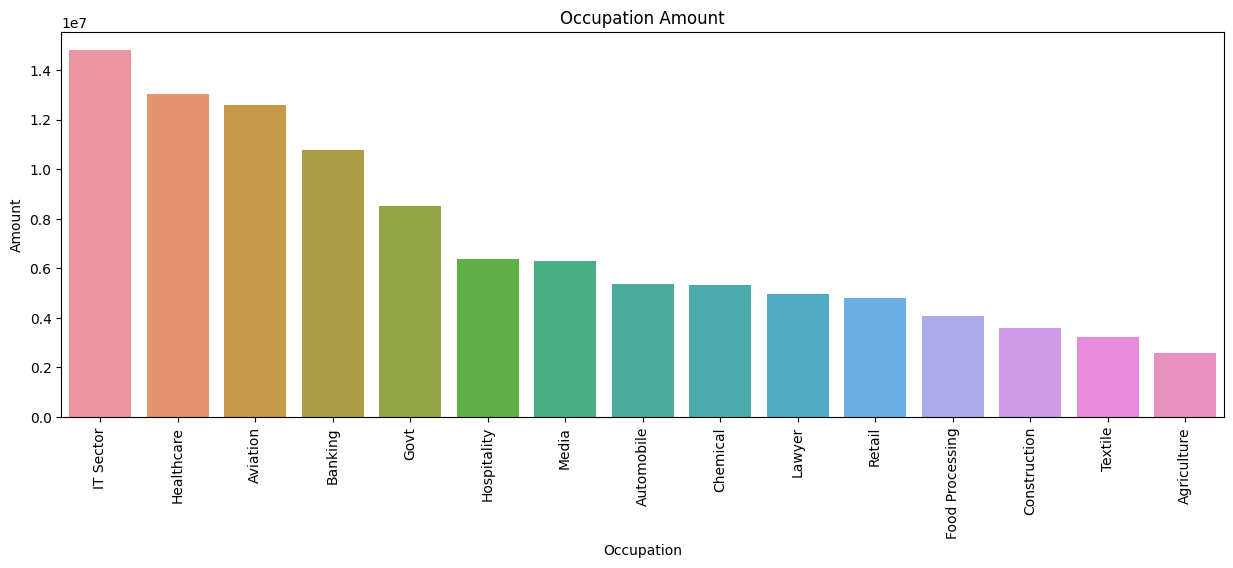

In [23]:
sales_Occupation  = df.groupby(["Occupation"],as_index = False)["Amount"].sum().sort_values(by= "Amount", ascending = False)

plt.figure(figsize=(15,5))
sns.barplot(x = "Occupation", y = "Amount", data = sales_Occupation)
plt.title("Occupation Amount")
plt.xticks(rotation = "vertical")
plt.show()

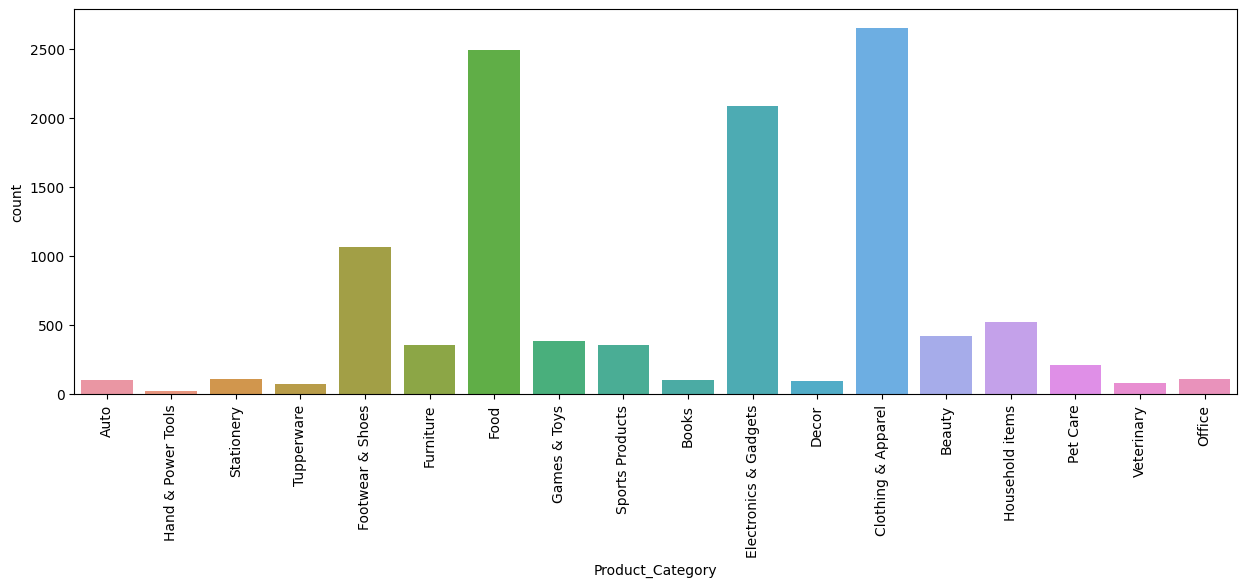

In [24]:
plt.figure(figsize= (15,5))
sns.countplot(x = "Product_Category",data  = df)
plt.xticks(rotation = "vertical")
plt.show()

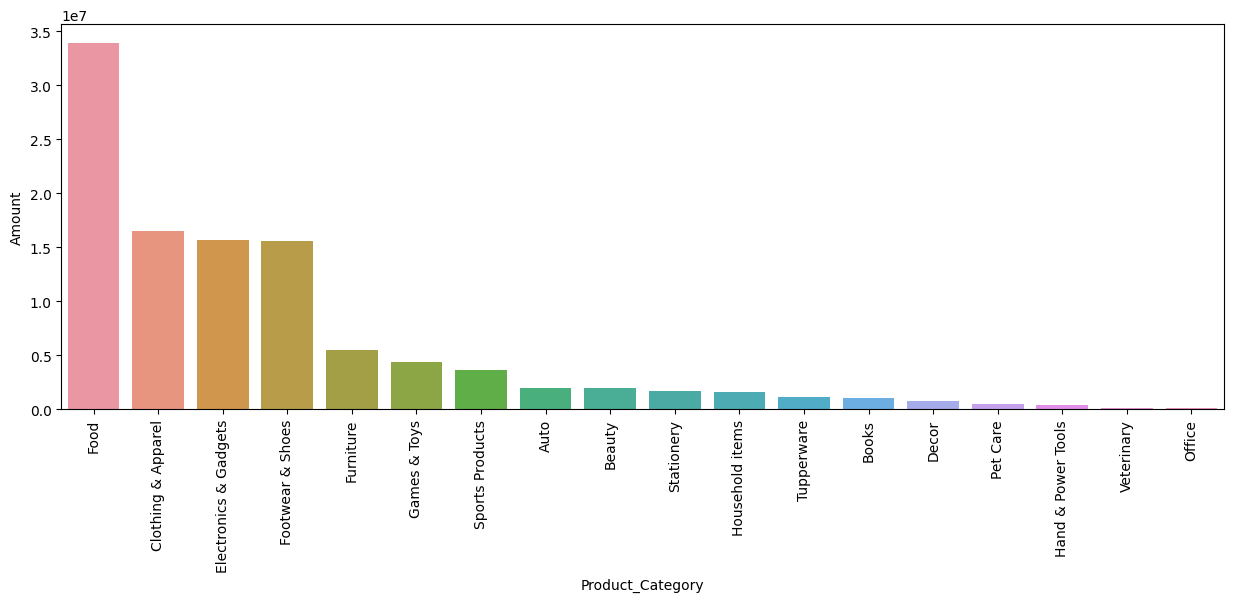

In [25]:
sales_Product_Category = df.groupby(["Product_Category"],as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)
plt.figure(figsize = (15,5))
sns.barplot(x = "Product_Category", y ="Amount", data = sales_Product_Category)
plt.xticks(rotation = "vertical")
plt.show()

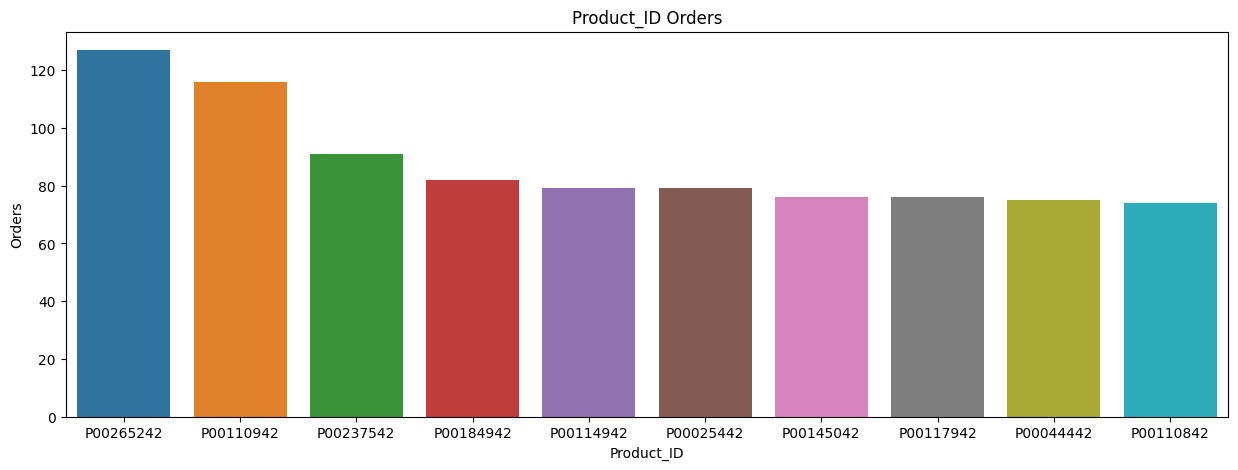

In [26]:
orders = df.groupby(["Product_ID"],as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = "Product_ID", y = "Orders" , data = orders)
plt.title("Product_ID Orders")
plt.show()


# Conclusion:
> Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category

# Thank you for visiting my Notebook